In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import skew
import statistics
from scipy import stats
from IPython.display import IFrame

In [ ]:
import zipfile
with zipfile.ZipFile("/content/US_Accidents_Dec20.csv.zip","r") as zip_ref:
    zip_ref.extractall("US_Accidents_Dec21_updated.csv")

In [ ]:
raw = pd.read_csv("/content/US_Accidents_Dec21_updated.csv/US_Accidents_Dec20.csv")

EDA- 1 

In [ ]:
raw.describe()

TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.716477e+06  4.232541e+06  4.232541e+06  4.232541e+06  1.516064e+06   
mean   2.083517e+02  2.305035e+00  3.639782e+01 -9.546420e+01  3.690061e+01   
std    2.124413e+01  5.332261e-01  4.964404e+00  1.735319e+01  5.165629e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.352058e+01 -1.173570e+02  3.385420e+01   
50%    2.010000e+02  2.000000e+00  3.582542e+01 -9.002078e+01  3.735134e+01   
75%    2.010000e+02  3.000000e+00  4.018313e+01 -8.084682e+01  4.072593e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.516064e+06  4.232541e+06  1.544592e+06    4.142641e+06   
mean  -9.859901e+01  3.357021e-01  6.141507e+03    6.147799e+01   
std    1.849590e+01  1.602143e+00  1.492268e+04    1.852586e+01   
min   -1.244978e+02  0.000000e+00  0.000000e+00   -8.900000e+01   
25%   -1.182077e+02  0.000000e+00  8.980000e+02    4.900000e+01   
50%   -9.437987e+01  0.000000e+00  2.890000e+03    6.300000e+01   
75%   -8.087449e+01  8.900000e-02  7.330000e+03    7.520000e+01   
max   -6.710924e+01  4.417500e+02  9.999997e+06    2.030000e+02   

       Wind_Chill(F)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count   2.336540e+06  4.137074e+06  4.156157e+06    4.133873e+06   
mean    5.489319e+01  6.567422e+01  2.969371e+01    9.111991e+00   
std     2.272355e+01  2.272342e+01  8.639260e-01    2.817582e+00   
min    -8.900000e+01  1.000000e+00  0.000000e+00    0.000000e+00   
25%     3.800000e+01  4.900000e+01  2.964000e+01    1.000000e+01   
50%     5.800000e+01  6.800000e+01  2.993000e+01    1.000000e+01   
75%     7.300000e+01  8.500000e+01  3.008000e+01    1.000000e+01   
max     1.890000e+02  1.000000e+02  5.804000e+01    1.400000e+02   

       Wind_Speed(mph)  Precipitation(in)  
count     3.753215e+06       2.166952e+06  
mean      7.903433e+00       1.244719e-02  
std       5.330998e+00       1.637154e-01  
min       0.000000e+00       0.000000e+00  
25%       4.600000e+00       0.000000e+00  
50%       7.000000e+00       0.000000e+00  
75%       1.040000e+01       0.000000e+00  
max       9.840000e+02       2.500000e+01

EDA- 2

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

Pre-Processing (1): Converting object type to categorical

In [ ]:
col = []
for i in zip(raw.columns.values,raw.dtypes):
    if i[1] == 'O':
        col.append(i[0])

print(col)
raw[col]=raw[col].astype('category')

['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


EDA- 3

In [ ]:
def checkMissing(raw):
    missingValues = pd.DataFrame(raw.isnull().sum()).reset_index()
    missingValues.columns = ['Feature', 'Percent(%)']
    missingValues['Missing_Percent(%)'] = missingValues['Percent(%)'].apply(lambda x: x / raw.shape[0]*100)

    return missingValues
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                      ID           0            0.000000
1                  Source           0            0.000000
2                     TMC     1516064           35.819240
3                Severity           0            0.000000
4              Start_Time           0            0.000000
5                End_Time           0            0.000000
6               Start_Lat           0            0.000000
7               Start_Lng           0            0.000000
8                 End_Lat     2716477           64.180760
9                 End_Lng     2716477           64.180760
10           Distance(mi)           0            0.000000
11            Description           2            0.000047
12                 Number     2687949           63.506745
13                 Street           0            0.000000
14                   Side           0            0.000000
15                   City         137            0.003237
16                 County           0            0.000000
17                  State           0            0.000000
18                Zipcode        1292            0.030525
19                Country           0            0.000000
20               Timezone        4615            0.109036
21           Airport_Code        8973            0.212000
22      Weather_Timestamp       62644            1.480057
23         Temperature(F)       89900            2.124020
24          Wind_Chill(F)     1896001           44.795809
25            Humidity(%)       95467            2.255548
26           Pressure(in)       76384            1.804684
27         Visibility(mi)       98668            2.331176
28         Wind_Direction       83611            1.975433
29        Wind_Speed(mph)      479326           11.324781
30      Precipitation(in)     2065589           48.802575
31      Weather_Condition       98383            2.324443
32                Amenity           0            0.000000
33                   Bump           0            0.000000
34               Crossing           0            0.000000
35               Give_Way           0            0.000000
36               Junction           0            0.000000
37                No_Exit           0            0.000000
38                Railway           0            0.000000
39             Roundabout           0            0.000000
40                Station           0            0.000000
41                   Stop           0            0.000000
42        Traffic_Calming           0            0.000000
43         Traffic_Signal           0            0.000000
44           Turning_Loop           0            0.000000
45         Sunrise_Sunset         141            0.003331
46         Civil_Twilight         141            0.003331
47      Nautical_Twilight         141            0.003331
48  Astronomical_Twilight         141            0.003331

Pre-Processing (2): dropping rows with null values

In [ ]:
# dropping rows with null values
raw = raw.dropna(subset=['Street','Side','Zipcode','County','State','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Turning_Loop'])

In [ ]:
# checking if all missing values are replaced
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                      ID           0            0.000000
1                  Source           0            0.000000
2                     TMC     1370980           36.914963
3                Severity           0            0.000000
4              Start_Time           0            0.000000
5                End_Time           0            0.000000
6               Start_Lat           0            0.000000
7               Start_Lng           0            0.000000
8                 End_Lat     2342907           63.085037
9                 End_Lng     2342907           63.085037
10           Distance(mi)           0            0.000000
11            Description           2            0.000054
12                 Number     2352285           63.337549
13                 Street           0            0.000000
14                   Side           0            0.000000
15                   City           0            0.000000
16                 County           0            0.000000
17                  State           0            0.000000
18                Zipcode           0            0.000000
19                Country           0            0.000000
20               Timezone           0            0.000000
21           Airport_Code           0            0.000000
22      Weather_Timestamp           0            0.000000
23         Temperature(F)           0            0.000000
24          Wind_Chill(F)     1393697           37.526640
25            Humidity(%)           0            0.000000
26           Pressure(in)           0            0.000000
27         Visibility(mi)           0            0.000000
28         Wind_Direction           0            0.000000
29        Wind_Speed(mph)           0            0.000000
30      Precipitation(in)     1613879           43.455253
31      Weather_Condition           0            0.000000
32                Amenity           0            0.000000
33                   Bump           0            0.000000
34               Crossing           0            0.000000
35               Give_Way           0            0.000000
36               Junction           0            0.000000
37                No_Exit           0            0.000000
38                Railway           0            0.000000
39             Roundabout           0            0.000000
40                Station           0            0.000000
41                   Stop           0            0.000000
42        Traffic_Calming           0            0.000000
43         Traffic_Signal           0            0.000000
44           Turning_Loop           0            0.000000
45         Sunrise_Sunset           0            0.000000
46         Civil_Twilight           0            0.000000
47      Nautical_Twilight           0            0.000000
48  Astronomical_Twilight           0            0.000000

EDA - 4

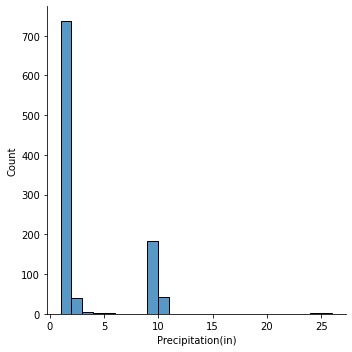

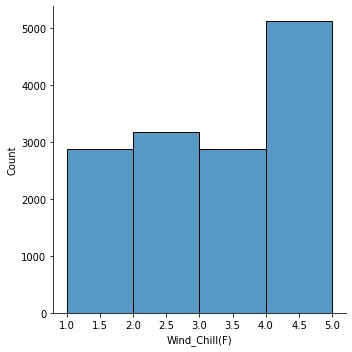

In [ ]:
sns.displot(raw, x='Precipitation(in)', bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
sns.displot(raw, x='Wind_Chill(F)', bins=[1,2,3,4,5])

EDA - 5

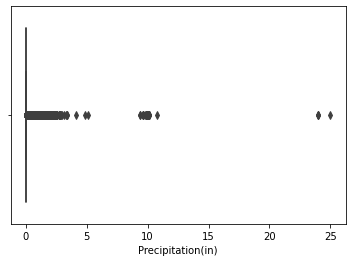

In [ ]:
sns.boxplot(x=raw["Precipitation(in)"])

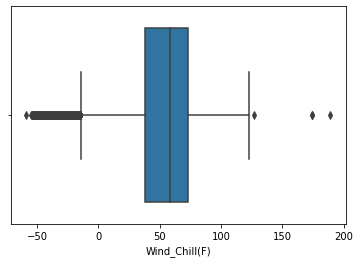

In [ ]:
sns.boxplot(x=raw["Wind_Chill(F)"])

Pre-processing (3): Replacing null values with mode after analyzing

In [ ]:
raw['Wind_Chill(F)'] = raw['Wind_Chill(F)'].fillna(raw['Wind_Chill(F)'].mode()[0])
raw['Precipitation(in)'] = raw['Precipitation(in)'].fillna(raw['Precipitation(in)'].mode()[0])

EDA - 6

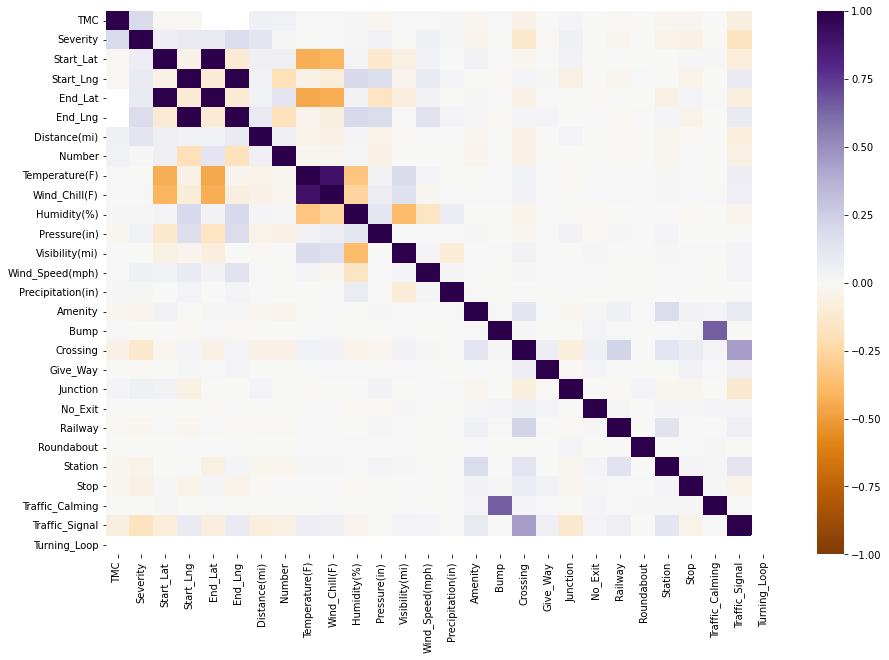

In [ ]:
cm = raw.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cm, vmin=-1, vmax=1, cmap="PuOr")
plt.show()

Pre-processing (4): Dropping coloumns which will not affect our prediction in future

In [ ]:
raw.drop(['ID','Number','Source','TMC'], axis=1, inplace=True)
raw.drop(['Start_Lat','Start_Lng','End_Lat','End_Lng','Airport_Code', 'Country', 'Description','Turning_Loop', 'Weather_Timestamp'], axis=1, inplace=True)
raw.head(5)

Severity           Start_Time             End_Time  Distance(mi)  \
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27          0.01   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34          0.01   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07          0.01   
5         3  2016-02-08 07:44:26  2016-02-08 08:14:26          0.01   
6         2  2016-02-08 07:59:35  2016-02-08 08:29:35          0.00   

                      Street Side          City      County State     Zipcode  \
2             State Route 32    R  Williamsburg    Clermont    OH       45176   
3                     I-75 S    R        Dayton  Montgomery    OH       45417   
4  Miamisburg Centerville Rd    R        Dayton  Montgomery    OH       45459   
5             Westerville Rd    R   Westerville    Franklin    OH       43081   
6             N Woodward Ave    R        Dayton  Montgomery    OH  45417-2476   

   ... Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  \
2  ...   False       False    False  False            False            True   
3  ...   False       False    False  False            False           False   
4  ...   False       False    False  False            False            True   
5  ...   False       False    False  False            False           False   
6  ...   False       False    False  False            False           False   

  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight Astronomical_Twilight  
2          Night           Night                Day                   Day  
3          Night             Day                Day                   Day  
4            Day             Day                Day                   Day  
5            Day             Day                Day                   Day  
6            Day             Day                Day                   Day  

[5 rows x 36 columns]

In [ ]:
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                Severity           0                 0.0
1              Start_Time           0                 0.0
2                End_Time           0                 0.0
3            Distance(mi)           0                 0.0
4                  Street           0                 0.0
5                    Side           0                 0.0
6                    City           0                 0.0
7                  County           0                 0.0
8                   State           0                 0.0
9                 Zipcode           0                 0.0
10               Timezone           0                 0.0
11         Temperature(F)           0                 0.0
12          Wind_Chill(F)           0                 0.0
13            Humidity(%)           0                 0.0
14           Pressure(in)           0                 0.0
15         Visibility(mi)           0                 0.0
16         Wind_Direction           0                 0.0
17        Wind_Speed(mph)           0                 0.0
18      Precipitation(in)           0                 0.0
19      Weather_Condition           0                 0.0
20                Amenity           0                 0.0
21                   Bump           0                 0.0
22               Crossing           0                 0.0
23               Give_Way           0                 0.0
24               Junction           0                 0.0
25                No_Exit           0                 0.0
26                Railway           0                 0.0
27             Roundabout           0                 0.0
28                Station           0                 0.0
29                   Stop           0                 0.0
30        Traffic_Calming           0                 0.0
31         Traffic_Signal           0                 0.0
32         Sunrise_Sunset           0                 0.0
33         Civil_Twilight           0                 0.0
34      Nautical_Twilight           0                 0.0
35  Astronomical_Twilight           0                 0.0

In [ ]:
# checking how many categories are created for each feature
raw2 = raw.select_dtypes(include='category')
result = raw2.apply(pd.Series.unique)
result

Start_Time               ['2016-02-08 06:49:27', '2016-02-08 07:23:34',...
End_Time                 ['2016-02-08 07:19:27', '2016-02-08 07:53:34',...
Street                   ['State Route 32', 'I-75 S', 'Miamisburg Cente...
Side                     ['R', 'L', ' ']
Categories (3, object): [' ', ...
City                     ['Williamsburg', 'Dayton', 'Westerville', 'Col...
County                   ['Clermont', 'Montgomery', 'Franklin', 'Lickin...
State                    ['OH', 'WV', 'CA', 'FL', 'GA', ..., 'ID', 'WY'...
Zipcode                  ['45176', '45417', '45459', '43081', '45417-24...
Timezone                 ['US/Eastern', 'US/Pacific', 'US/Central', 'US...
Wind_Direction           ['SW', 'SSW', 'WSW', 'WNW', 'NW', ..., 'W', 'S...
Weather_Condition        ['Overcast', 'Mostly Cloudy', 'Light Rain', 'R...
Sunrise_Sunset           ['Night', 'Day']
Categories (2, object): ['Day...
Civil_Twilight           ['Night', 'Day']
Categories (2, object): ['Day...
Nautical_Twilight        

In [ ]:
for i in result:
    print(len(i))

3206519
3319643
197346
3
11824
1734
49
451125
4
23
127
2
2
2
2


Pre-processing (5): Changing datatype

In [ ]:
raw['Start_Time'] = pd.to_datetime(raw['Start_Time'])
raw['End_Time'] = pd.to_datetime(raw['End_Time'])

Pre-processing (6): extracting new features out of current ones

In [ ]:
raw['Duration'] = raw.End_Time - raw.Start_Time 
raw['Duration'] = raw['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
raw['Year'] = raw['Start_Time'].dt.year

raw['Month'] = raw['Start_Time'].dt.month
raw['Weekday']= raw['Start_Time'].dt.weekday



Pre-processing (7): Converting to ordinal feature

In [ ]:
print(raw['Precipitation(in)'].max())
print(raw['Precipitation(in)'].min())

raw.loc[(raw["Precipitation(in)"] == 0), "Rainfall"] = 0

raw.loc[(raw["Precipitation(in)"] > 0) &(raw["Precipitation(in)"] < 5) , "Rainfall"] = 1

raw.loc[(raw["Precipitation(in)"] >= 5) &(raw["Precipitation(in)"] < 15) , "Rainfall"] = 2

raw.loc[(raw["Precipitation(in)"] >= 15), "Rainfall"] = 3
raw["Rainfall"].astype(int)

25.0
0.0


2          0
3          0
4          0
5          1
6          0
          ..
4232536    0
4232537    0
4232538    0
4232539    0
4232540    0
Name: Rainfall, Length: 3713887, dtype: int64

EDA - 7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


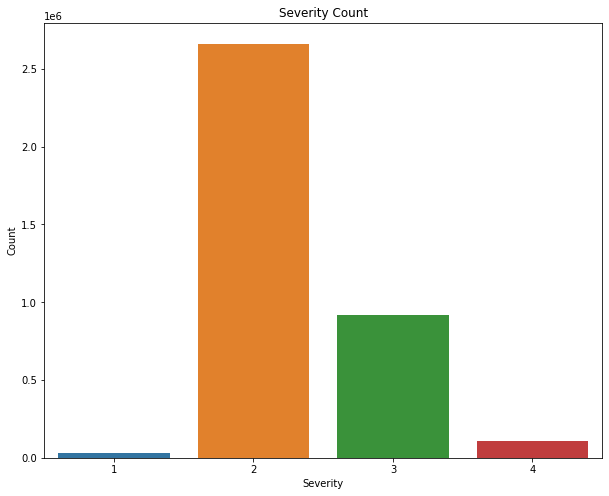

In [ ]:
sev_count = raw["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity Count")
sns.barplot(sev_count.index, sev_count.values)
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

Pre-processing (8): Undersampling data

In [ ]:
size = len(raw[raw["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = raw[raw["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
raw = df

Pre-processing (9): Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Duration','Year', 'Month','Weekday']
raw[features] = scaler.fit_transform(raw[features])

Pre-processing (10): Split the data into train and test

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

colist = raw.columns.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(raw[colist[1:]],raw['Severity'], test_size=0.20, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(91324, 40) (22832, 40) (91324,) (22832,)


EDA - 8

In [ ]:
import plotly.express as px
fig = px.histogram(raw, x="State",
             color='Severity', barmode='group',
             histfunc='sum',
             height=1500)
fig.update_layout(
    title="Severity of Accidents in Different States",
    yaxis_title="Count"
)
fig.show()

EDA - 9

In [ ]:
fig = px.histogram(raw, x="State",
             color='Side', barmode='group',
             histfunc='sum',
             height=700)
fig.update_layout(
    title="Count of Accidents on Right and Left Side of the Road for Different States",
    yaxis_title="Count"
)
fig.show()

EDA - 10

In [ ]:
fig = px.histogram(raw, x="Side",
             color='Sunrise_Sunset', barmode='group',
             histfunc='sum',
             height=600)
fig.update_layout(
    title="Total occurrence of Right and Left Side of the Road Differentiated for Day and Night Time",
    yaxis_title="Total Occurence"
)
fig.show()